<a href="https://colab.research.google.com/github/dbtjr1103/Basic_practice/blob/main/to_find_food_classification_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# data download

In [1]:
!pip install split-folders
!pip install -q kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
# .kaggle 폴더 생성
!mkdir -p ~/.kaggle/
# kaggle.josn .kaggle로 복사
!cp kaggle.json ~/.kaggle/
# 해당 폴더 목록 확인(복사 잘 되었는지 확인)
!ls ~/.kaggle

kaggle.json


In [5]:
cd ~

/root


In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
cd /content

/content


In [8]:
!kaggle datasets download -d kmader/food41

100% 5.30G/5.30G [00:30<00:00, 193MB/s]
100% 5.30G/5.30G [00:30<00:00, 188MB/s]


In [9]:
!unzip -q food41.zip

In [2]:
import splitfolders

import os

import cv2
import numpy as np
from tqdm.notebook import tqdm

from matplotlib import pyplot as plt
import matplotlib.cm as cm

import tensorflow as tf

import pickle

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from tensorflow.keras import datasets, layers, models

from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout, BatchNormalization

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [11]:
# label 101 -> 60
import shutil

food_list = ['baby_back_ribs', 'baklava', 'beignets', 'bruschetta', 'ceviche', 'crab_cakes', 'croque_madame', 'deviled_eggs',
             'escargots', 'falafel', 'french_onion_soup', 'frozen_yogurt', 'hot_and_sour_soup', 'huevos_rancheros',
             'hummus', 'lobster_bisque', 'poutine', 'samosa', 'shrimp_and_grits', 'clam_chowder',
             'seaweed_salad', 'paella', 'apple_pie', 'beef_tartare', 'beet_salad', 'bread_pudding', 'breakfast_burrito',
             'cannoli', 'caprese_salad', 'carrot_cake', 'chocolate_mousse', 'creme_brulee', 'fish_and_chips', 'fried_calamari',
             'gnocchi', 'greek_salad', 'panna_cotta', 'ravioli', 'spaghetti_carbonara', 'spring_rolls',
             'tuna_tartare']

for food in food_list:

  shutil.rmtree('/content/images/' + food)

In [3]:
folder_path = '/content/images'
label_names = os.listdir(folder_path)
print(len(label_names))

60


In [13]:
dataset = {}

# 이미지와 라벨 리스트에 담기
for label in label_names:
    sub_path = folder_path+'/'+label+'/'
    dataset[label] = []
    for filename in os.listdir(sub_path):
        dataset[label].append(sub_path+filename)

len(dataset)

60

In [14]:
# resize 덮어씌우기
for label, filenames in tqdm(dataset.items()):
    for filename in filenames:
        img = cv2.imread(filename)

        # 이미지의 x, y가 128이 넘을 경우 작게해주기
        percent = 1
        if(img.shape[1] > img.shape[0]) :       # 이미지의 가로가 세보다 크면 가로를 128으로 맞추고 세로를 비율에 맞춰서
            percent = 160/img.shape[1]
        else :
            percent = 160/img.shape[0]

        img = cv2.resize(img, dsize=(0, 0), fx=percent, fy=percent, interpolation=cv2.INTER_LINEAR)
                # 이미지 범위 지정
        y,x,h,w = (0,0,img.shape[0], img.shape[1])

        # 그림 주변에 검은색으로 칠하기
        w_x = (160-(w-x))/2  # w_x = (128 - 그림)을 뺀 나머지 영역 크기 [ 그림나머지/2 [그림] 그림나머지/2 ]
        h_y = (160-(h-y))/2

        if(w_x < 0):         # 크기가 -면 0으로 지정.
            w_x = 0
        elif(h_y < 0):
            h_y = 0

        M = np.float32([[1,0,w_x], [0,1,h_y]])  #(2*3 이차원 행렬)
        img_re = cv2.warpAffine(img, M, (160, 160)) #이동변환  
       
        cv2.imwrite('/content/images/{0}/{1}'.format(label, filename.split("/")[-1]) , img_re)

  0%|          | 0/60 [00:00<?, ?it/s]

In [15]:
splitfolders.ratio('/content/images', output='/content/dataset', seed=77, ratio=(0.8, 0.2))

Copying files: 60000 files [00:07, 7941.11 files/s]


In [4]:
label2index = {}
for idx, label in enumerate(label_names):
    label2index[label] = idx
label2index

{'steak': 0,
 'lasagna': 1,
 'pad_thai': 2,
 'french_toast': 3,
 'nachos': 4,
 'onion_rings': 5,
 'waffles': 6,
 'gyoza': 7,
 'chicken_wings': 8,
 'foie_gras': 9,
 'red_velvet_cake': 10,
 'caesar_salad': 11,
 'mussels': 12,
 'strawberry_shortcake': 13,
 'pulled_pork_sandwich': 14,
 'dumplings': 15,
 'ice_cream': 16,
 'grilled_cheese_sandwich': 17,
 'pho': 18,
 'cup_cakes': 19,
 'filet_mignon': 20,
 'peking_duck': 21,
 'grilled_salmon': 22,
 'tacos': 23,
 'cheesecake': 24,
 'macarons': 25,
 'chicken_quesadilla': 26,
 'pizza': 27,
 'french_fries': 28,
 'guacamole': 29,
 'macaroni_and_cheese': 30,
 'bibimbap': 31,
 'donuts': 32,
 'sashimi': 33,
 'sushi': 34,
 'hamburger': 35,
 'risotto': 36,
 'takoyaki': 37,
 'spaghetti_bolognese': 38,
 'hot_dog': 39,
 'pork_chop': 40,
 'pancakes': 41,
 'garlic_bread': 42,
 'omelette': 43,
 'miso_soup': 44,
 'club_sandwich': 45,
 'prime_rib': 46,
 'eggs_benedict': 47,
 'edamame': 48,
 'oysters': 49,
 'chicken_curry': 50,
 'tiramisu': 51,
 'lobster_roll_sa

In [ ]:
# datagen = ImageDataGenerator(
#     rotation_range=90,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     vertical_flip=True,
# )

In [ ]:
# folder_path = '/content/dataset/train'

# for label in  tqdm(os.listdir(folder_path)):
#     label_path = folder_path + '/' + label + '/'
#     for filename in os.listdir(label_path): 
#         filepath = label_path + filename

#         img = load_img(filepath)
#         # img 출력
#         # plt.imshow(img)
#         # break
#         x = img_to_array(img)
#         # x.shape 출력
#         # print(x.shape)
#         # break
#         x = x.reshape((1,) + x.shape)

#         i = 0
#         # flow : augmentation 함수
#         for batch in datagen.flow(x, batch_size=1,
#                                 save_to_dir=label_path, save_prefix=label, save_format='jpg'):
#             i += 1
#             if i > 1:
#                 break  

  0%|          | 0/60 [00:00<?, ?it/s]

In [5]:
folder_path = '/content/dataset/train'
dataset = {}

# 이미지와 라벨 리스트에 담기
for label in os.listdir(folder_path):
    sub_path = folder_path+'/'+label+'/'
    dataset[label] = []
    for filename in os.listdir(sub_path):
        dataset[label].append(sub_path+filename)

In [6]:
x_train, y_train = [], []

for label, filenames in tqdm(dataset.items()):
    for filename in filenames:
        image = cv2.imread(filename) # img를 array 형태로 변경

        x_train.append(image)
        y_train.append(label2index[label]) # label을 index로 변경

  0%|          | 0/60 [00:00<?, ?it/s]

In [7]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [8]:
x_train[0]

array([[[252, 230, 218],
        [252, 230, 218],
        [251, 231, 220],
        ...,
        [239, 216, 190],
        [238, 216, 188],
        [237, 215, 187]],

       [[251, 232, 219],
        [252, 233, 220],
        [252, 232, 221],
        ...,
        [242, 219, 193],
        [241, 219, 191],
        [240, 218, 190]],

       [[251, 233, 222],
        [251, 233, 222],
        [251, 233, 222],
        ...,
        [244, 221, 195],
        [243, 220, 194],
        [242, 219, 193]],

       ...,

       [[141, 144, 148],
        [141, 144, 148],
        [141, 144, 149],
        ...,
        [229, 220, 207],
        [225, 213, 201],
        [235, 222, 208]],

       [[141, 142, 146],
        [141, 142, 146],
        [141, 141, 147],
        ...,
        [237, 224, 208],
        [240, 225, 209],
        [235, 220, 204]],

       [[141, 142, 146],
        [140, 141, 145],
        [139, 139, 145],
        ...,
        [229, 216, 200],
        [233, 217, 200],
        [235, 219, 202]]

In [13]:
x_train = x_train.astype('int8')
# x_train = x_train / 255 ()

In [9]:
x_train.shape, y_train.shape

((48000, 160, 160, 3), (48000,))

In [10]:
folder_path = '/content/dataset/val'
dataset = {}

# 이미지와 라벨 리스트에 담기
for label in os.listdir(folder_path):
    sub_path = folder_path+'/'+label+'/'
    dataset[label] = []
    for filename in os.listdir(sub_path):
        dataset[label].append(sub_path+filename)

In [11]:
x_val, y_val = [], []

for label, filenames in dataset.items():
    for filename in filenames:
        image = cv2.imread(filename) # img를 array 형태로 변경

        x_val.append(image)
        y_val.append(label2index[label]) # label을 index로 변경

In [12]:
x_val, y_val= np.array(x_val), np.array(y_val)

In [14]:
x_val = x_val.astype('int8')

In [15]:
x_val.shape, y_val.shape

((12000, 160, 160, 3), (12000,))

In [16]:
def zero_mean(image):
    # zero-centering
    return np.mean(image, axis=0)

In [17]:
zero_mean_img = zero_mean(x_train).astype('int8')

In [18]:
x_train -= zero_mean_img
x_val -= zero_mean_img

In [19]:
x_train[0]

array([[[  -9,  -30,  -39],
        [  -9,  -30,  -39],
        [ -10,  -29,  -37],
        ...,
        [ -23,  -44,  -67],
        [ -24,  -44,  -69],
        [ -25,  -45,  -70]],

       [[ -10,  -28,  -38],
        [  -9,  -26,  -37],
        [  -9,  -28,  -36],
        ...,
        [ -20,  -41,  -64],
        [ -21,  -41,  -66],
        [ -22,  -42,  -67]],

       [[ -10,  -27,  -35],
        [ -10,  -27,  -35],
        [ -10,  -26,  -35],
        ...,
        [ -18,  -39,  -62],
        [ -19,  -40,  -63],
        [ -20,  -41,  -64]],

       ...,

       [[-116, -111, -103],
        [-116, -111, -103],
        [-116, -111, -102],
        ...,
        [ -29,  -35,  -44],
        [ -33,  -42,  -50],
        [ -23,  -33,  -44]],

       [[-116, -113, -105],
        [-116, -113, -105],
        [-116, -114, -104],
        ...,
        [ -21,  -31,  -44],
        [ -18,  -30,  -43],
        [ -23,  -35,  -48]],

       [[-117, -113, -106],
        [-118, -114, -106],
        [-118, -

# model handling

In [20]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pathlib import Path
import os.path

from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from tensorflow.keras import datasets, layers, models, Input
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D
from tensorflow.keras.layers import Dropout, BatchNormalization

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

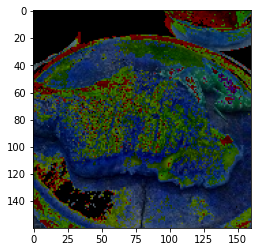

In [21]:
plt.figure()
plt.imshow(x_train[1])
plt.show()

In [22]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((48000, 160, 160, 3), (48000,), (12000, 160, 160, 3), (12000,))

In [23]:
y_train = y_train.reshape((48000,1))
y_val = y_val.reshape((12000,1))

## Resnet50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
model = ResNet50(
    input_shape=(160, 160, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg')
print(len(model.layers))

176


In [ ]:
model.trainable = False

inputs = tf.keras.Input(shape=(160, 160, 3))

x = model(inputs, training=False)

x = tf.keras.layers.Flatten(input_shape=model.output_shape[1:])(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(60, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])

print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 128)               262272    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0   

In [ ]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

model.fit(x_train, y_train, epochs = 30, validation_data=(x_val,y_val), batch_size=320, callbacks=[early])

Epoch 1/30
428/428 [==============================] - 225s 518ms/step - loss: 4.0850 - accuracy: 0.0205 - val_loss: 3.9857 - val_accuracy: 0.0458
Epoch 2/30
428/428 [==============================] - 234s 547ms/step - loss: 4.0205 - accuracy: 0.0292 - val_loss: 3.9367 - val_accuracy: 0.0518
Epoch 3/30
428/428 [==============================] - 234s 547ms/step - loss: 3.9940 - accuracy: 0.0318 - val_loss: 3.9187 - val_accuracy: 0.0512
Epoch 4/30
428/428 [==============================] - 235s 549ms/step - loss: 3.9825 - accuracy: 0.0321 - val_loss: 3.9129 - val_accuracy: 0.0551
Epoch 5/30
420/428 [============================>.] - ETA: 4s - loss: 3.9769 - accuracy: 0.0330

KeyboardInterrupt: ignored

## MobileNetV2

In [24]:
model = tf.keras.applications.MobileNetV2(
    input_shape=(160, 160, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg')
print(len(model.layers))

9406464/9406464 [==============================] - 0s 0us/step
155


In [25]:
model.trainable = False

inputs = tf.keras.Input(shape=(160, 160, 3))

x = model(inputs, training=False)

x = tf.keras.layers.Flatten(input_shape=model.output_shape[1:])(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)

outputs = tf.keras.layers.Dense(60, activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(optimizer = 'adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 1280)             2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 128)               163968    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 60)                7740      
                                                             

In [26]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

model.fit(x_train, y_train, epochs = 30, validation_data=(x_val,y_val), batch_size=128, callbacks=[early])

Epoch 1/30
375/375 [==============================] - 48s 97ms/step - loss: 4.0007 - accuracy: 0.0400 - val_loss: 3.7339 - val_accuracy: 0.1023
Epoch 2/30
375/375 [==============================] - 35s 92ms/step - loss: 3.7845 - accuracy: 0.0745 - val_loss: 3.5773 - val_accuracy: 0.1262
Epoch 3/30
375/375 [==============================] - 35s 94ms/step - loss: 3.7044 - accuracy: 0.0859 - val_loss: 3.5230 - val_accuracy: 0.1442
Epoch 4/30
375/375 [==============================] - 35s 94ms/step - loss: 3.6618 - accuracy: 0.0909 - val_loss: 3.4964 - val_accuracy: 0.1507
Epoch 5/30
375/375 [==============================] - 35s 93ms/step - loss: 3.6386 - accuracy: 0.0972 - val_loss: 3.4514 - val_accuracy: 0.1618
Epoch 6/30
375/375 [==============================] - 35s 94ms/step - loss: 3.6276 - accuracy: 0.0987 - val_loss: 3.4343 - val_accuracy: 0.1612
Epoch 7/30
375/375 [==============================] - 35s 93ms/step - loss: 3.6102 - accuracy: 0.1011 - val_loss: 3.4480 - val_accuracy: